Saving Restaurant_revenue.xlsx to Restaurant_revenue (6).xlsx
Dataset Overview:
   Marketing_Spend  Monthly_Revenue
0        12.663793       350.912040
1         4.577892       221.319091
2         4.652911       326.529763
3         4.416053       348.190573
4         3.475052       185.009121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing_Spend  1000 non-null   float64
 1   Monthly_Revenue  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None

Result Parameters:

Intercept (beta_0): [220.90667978]
Slope (beta_1): [4.80156727]


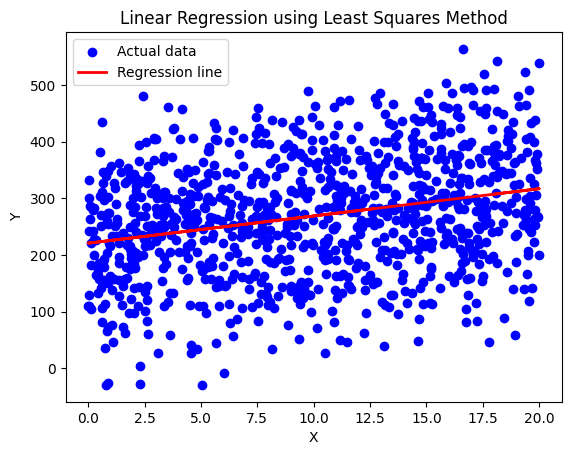

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
filename = list(uploaded.keys())[0]
data = pd.read_excel(filename)

# Display basic info
print("Dataset Overview:")
print(data.head())
print(data.info())

# Assuming 'Marketing_Spend' and 'Revenue' are columns in the dataset
data = data.dropna()  # Remove rows with missing values if necessary

# Define features and target variable
X = data['Marketing_Spend'].values.reshape(-1, 1)  # Feature column reshaped to 2D
Y = data['Monthly_Revenue'].values.reshape(-1, 1)  # Target column

# Fit the model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Print the results
print(f"\nResult Parameters:\n")
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

# Make predictions
Y_pred = model.predict(X)

# Visualize the results
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using Least Squares Method')
plt.legend()
plt.show()

Find the regression equation and what is the predicted monthly revenue when marketing spenditure hits 12 million dollars?

Saving Restaurant_revenue.xlsx to Restaurant_revenue (11).xlsx


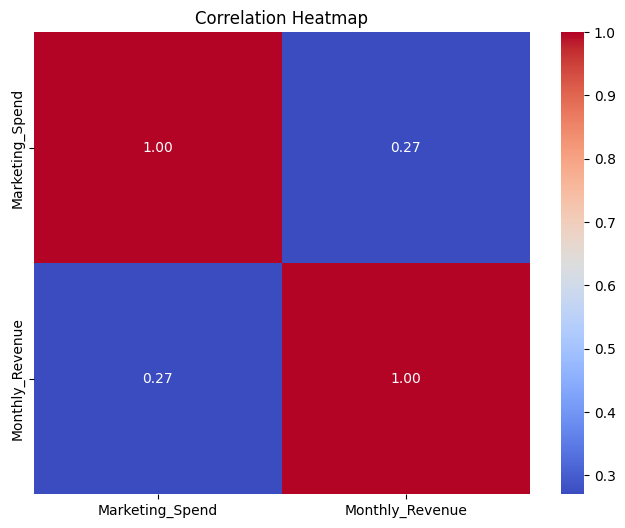

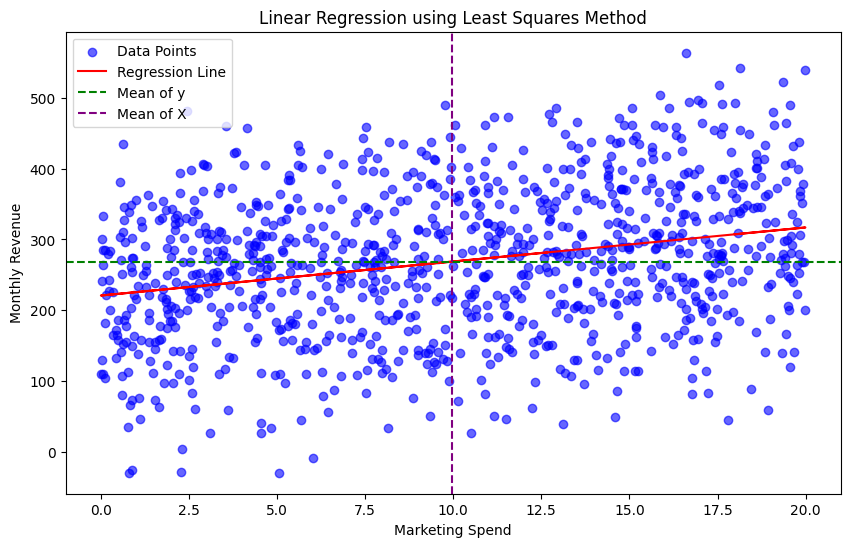

Mean of Marketing Spend (X): 9.958725936364612
Mean of Monthly Revenue (y): 268.7241722980476

Covariance Matrix:
[[   34.17088092   164.07378347]
 [  164.07378347 10812.45388405]]

Coefficients (Least Squares Method):
Intercept: 220.91
Slope: 4.80


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
filename = list(uploaded.keys())[0]
data = pd.read_excel(filename)

# Extract features and target variable
X = data['Marketing_Spend'].values.reshape(-1, 1)
y = data['Monthly_Revenue'].values.reshape(-1, 1)

# Mean value of features and target
mean_X = np.mean(X)
mean_y = np.mean(y)

# Covariance matrix
cov_matrix = np.cov(data['Marketing_Spend'], data['Monthly_Revenue'])

# Correlation matrix and heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Linear Regression using Least Squares Method
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
theta_lse = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Least Squares Estimation

# Regression line predictions
y_pred = X_b.dot(theta_lse)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data Points", color="blue", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.axhline(y=mean_y, color="green", linestyle="--", label="Mean of y")
plt.axvline(x=mean_X, color="purple", linestyle="--", label="Mean of X")
plt.title("Linear Regression using Least Squares Method")
plt.xlabel("Marketing Spend")
plt.ylabel("Monthly Revenue")
plt.legend()
plt.show()

# Display results
print("Mean of Marketing Spend (X):", mean_X)
print("Mean of Monthly Revenue (y):", mean_y)
print("\nCovariance Matrix:")
print(cov_matrix)
print("\nCoefficients (Least Squares Method):")
print(f"Intercept: {theta_lse[0][0]:.2f}")
print(f"Slope: {theta_lse[1][0]:.2f}")

Find the regression equation and what is the predicted monthly revenue when marketing spenditure hits 12 million dollars?

In [22]:
import numpy as np
import pandas as pd

# Extract features and target variable
X = data['Marketing_Spend'].values.reshape(-1, 1)
y = data['Monthly_Revenue'].values.reshape(-1, 1)

# Linear Regression using Least Squares Method
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
theta_lse = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Least Squares Estimation

# Extract coefficients
theta_0 = theta_lse[0][0]  # Intercept
theta_1 = theta_lse[1][0]  # Slope

# Add predicted values to the dataframe
data['Predicted_Monthly_Revenue'] = theta_0 + theta_1 * data['Marketing_Spend']

# Display the first 5 rows
print(data.head())

# Calculate and display predicted revenue when marketing spenditure is 12
marketing_spend = 12
predicted_revenue = theta_0 + theta_1 * marketing_spend
print(f"\nRegression Equation: y = {theta_0:.2f} + {theta_1:.2f} * x")
print(f"Predicted Revenue for 12 Million Dollar Marketing Spenditure = {predicted_revenue:.2f}")



   Marketing_Spend  Monthly_Revenue  Predicted_Monthly_Revenue
0        12.663793       350.912040                 281.712731
1         4.577892       221.319091                 242.887737
2         4.652911       326.529763                 243.247944
3         4.416053       348.190573                 242.110653
4         3.475052       185.009121                 237.592375

Regression Equation: y = 220.91 + 4.80 * x
Predicted Revenue for 12 Million Dollar Marketing Spenditure = 278.53


In [23]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Calculate R-squared
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)   # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

# Display results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")


Mean Squared Error (MSE): 10014.62
R-squared (Coefficient of Determination): 0.07
